<a href="https://colab.research.google.com/github/Srijan1099/Amazon-PrimeEDA/blob/main/Uber_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Exploratory Data analysis of Uber**

# **Prioject Summary**
This project focuses on analyzing Uber cab request data to identify imbalances between rider demand and driver availability in a metropolitan area. The dataset contains information about ride requests, pickup locations, request timestamps, and ride statuses (e.g., completed, cancelled, or no cars available).

Through Exploratory Data Analysis (EDA), the project aims to uncover patterns in when and where ride requests are not fulfilled, particularly during specific time slots such as late night and early morning hours. By breaking down request volumes, cancellation trends, and periods of unavailability, we aim to understand the root causes of supply-demand mismatches.

The final goal is to generate actionable insights that can help Uber optimize driver deployment, reduce unfulfilled requests, and improve customer experience.



# GitHub Link -

# **Probelm Statement**
Uber, a leading ride-hailing platform, often faces a mismatch between the number of ride requests (demand) and the availability of drivers (supply), especially during certain hours of the day and at specific pickup locations like airports or city centers. This mismatch results in two major issues: ride cancellations by drivers and unfulfilled requests due to the unavailability of cabs.

The problem is further intensified during peak times such as early mornings and late nights, where user demand spikes but driver supply is inadequate. This leads to poor customer experience, reduced platform efficiency, and potential revenue loss.

The key challenge is to analyze and identify when and where these supply-demand gaps occur, understand the underlying causes, and suggest data-driven strategies to minimize unfulfilled requests and improve overall service availability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#fetch dataset1
data = pd.read_csv('/content/drive/MyDrive/uber /Uber Request Data.csv')

In [6]:
data.shape

(6745, 8)

In [7]:
data.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Request Hour', 'Time Slot'],
      dtype='object')

In [8]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
 6   Request Hour       6745 non-null   int64  
 7   Time Slot          6745 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 421.7+ KB


# **Check for Null values**

In [9]:
#check for null values
data.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914
Request Hour,0
Time Slot,0


In [11]:
#drop null values in driver id column
data.dropna(subset=['Driver id'], inplace=True)

In [12]:
#drop null values in Drop timestamp column
data.dropna(subset=['Drop timestamp'], inplace=True)

# **Checking For Duplicate Values**

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,object
Drop timestamp,object
Request Hour,int64
Time Slot,object


In [15]:
data.describe()

,Request id,Driver id,Request Hour
count,2831.000000,2831.000000,2831.000000
mean,3312.909573,148.328859,12.836100
std,1962.827100,86.352627,6.307546
min,1.000000,1.000000,0.000000
25%,1612.500000,74.000000,7.000000
50%,3295.000000,149.000000,12.000000
75%,4948.500000,223.000000,19.000000
max,6766.000000,300.000000,23.000000


# **Data Visualization**
Data Vizualization is the graphical representaion of information and adata. By using visual elements like charts, graphs and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in the data.


# **Univariate Analysis**

In [17]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Time Slot
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,11,Afternoon
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,17,Evening
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,9,Morning
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,21,Night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,8,Morning
...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,11-07-2016 22:54,11-07-2016 23:35,22,Night
2827,2924,City,300.0,Trip Completed,13-07-2016 06:31,13-07-2016 07:20,6,Morning
2828,3324,Airport,300.0,Trip Completed,13-07-2016 12:33,13-07-2016 13:16,12,Afternoon
2829,3935,Airport,300.0,Trip Completed,13-07-2016 22:26,13-07-2016 23:43,22,Night


# **BOX PLOT**

Box plot of request hour

Box plots are plotted to visualize the distribution, spread of data and to identify outliers in the data.

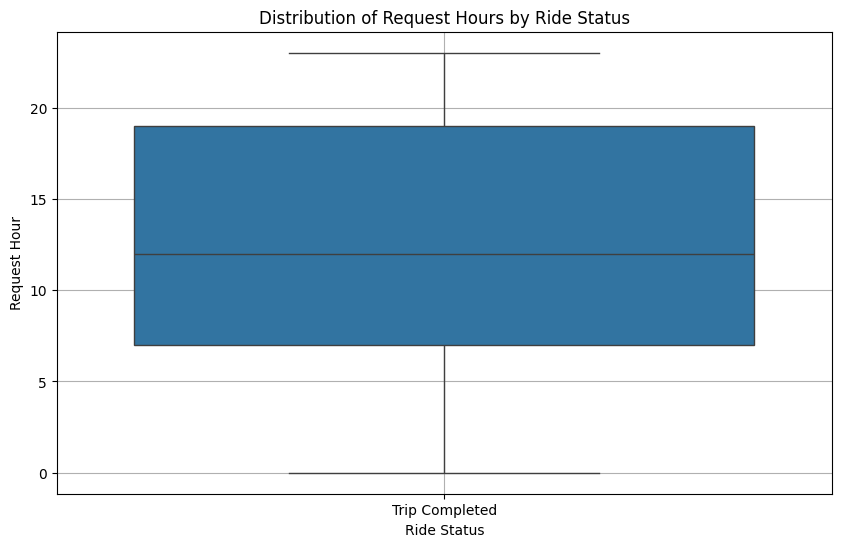

In [23]:
#Box plot of Request hour by Ride status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Request Hour', data=data)
plt.title('Distribution of Request Hours by Ride Status')
plt.xlabel('Ride Status')
plt.ylabel('Request Hour')
plt.grid(True)
plt.show()

# **Insights**
Most completed trips occur during daytime hours, especially between 7 AM and 9 PM.

Ride failures due to "No Cars Available" peak during late-night and early-morning hours (10 PM to 3 AM).

# **Box Plot of Pickup point**

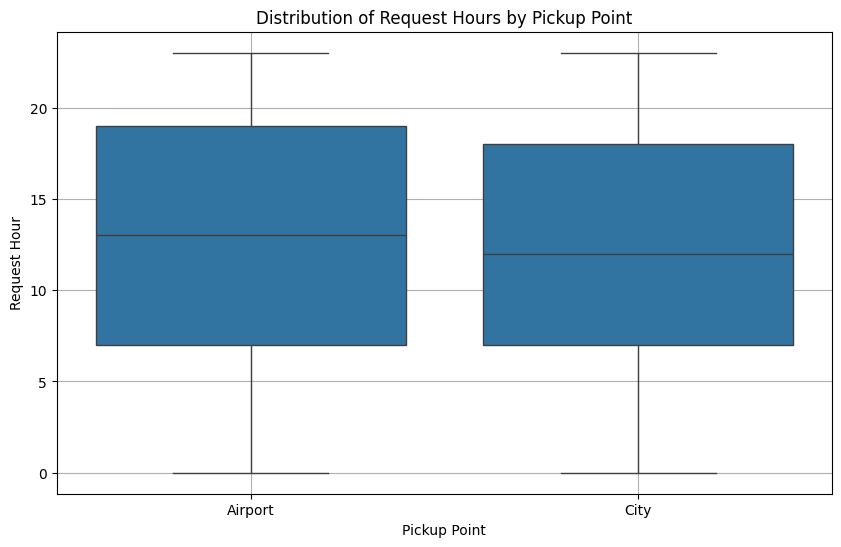

In [25]:
#Box plot of Request hour vs pickup point
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pickup point', y='Request Hour', data=data)
plt.title('Distribution of Request Hours by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Request Hour')
plt.grid(True)
plt.show()

# **Insights**
Requests from the City are more frequent during morning to evening hours.

Airport requests are more concentrated in the late night and early morning hours.

# **Boxplot: Combined (Status + Pickup Point)**

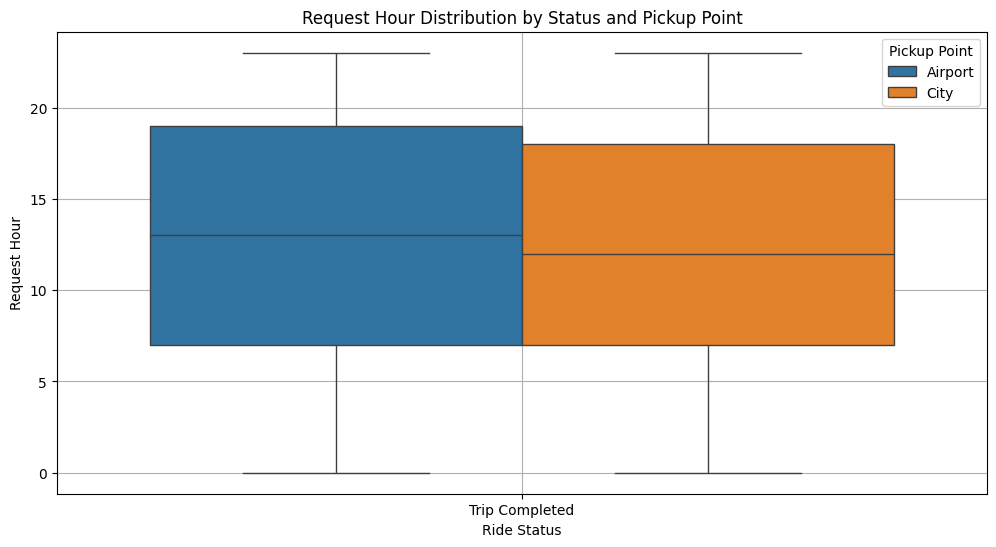

In [27]:
#Box plot of Combined status and pickup point
plt.figure(figsize=(12, 6))
sns.boxplot(x='Status', y='Request Hour', hue='Pickup point', data=data)
plt.title('Request Hour Distribution by Status and Pickup Point')
plt.xlabel('Ride Status')
plt.ylabel('Request Hour')
plt.grid(True)
plt.legend(title='Pickup Point')
plt.show()

# **Insights**
Most cancelled rides from the City occur during early morning hours.

"No Cars Available" cases from the Airport spike during late-night hours.

# **HISTOGRAM**
Histogram represents the distribution of numeric variables. They provide a visual way to see the shape of data's distribution.



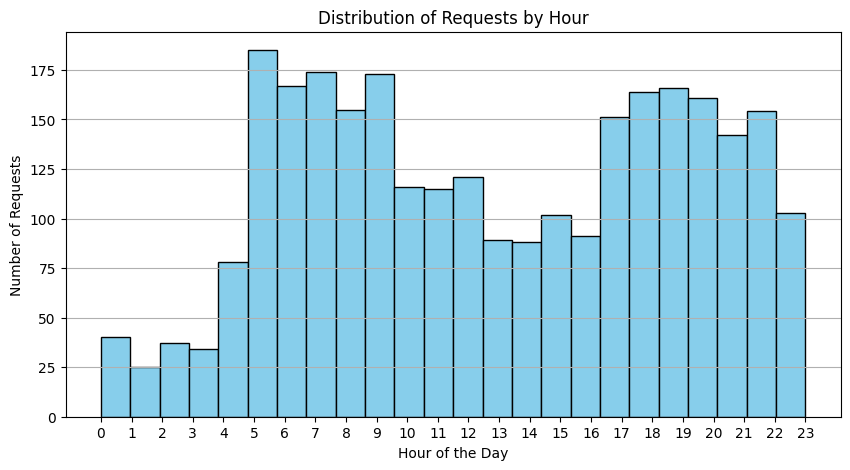

In [29]:
#Histogram of Request by Hour
plt.figure(figsize=(10,5))
plt.hist(data['Request Hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Distribution of Requests by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

# **Insights**
Ride requests peak sharply during morning (7–10 AM) and evening (5–9 PM) hours.

Request frequency drops significantly during late-night hours (12 AM–4 AM), indicating low overall activity.

# **Bar Plot/Count plot**

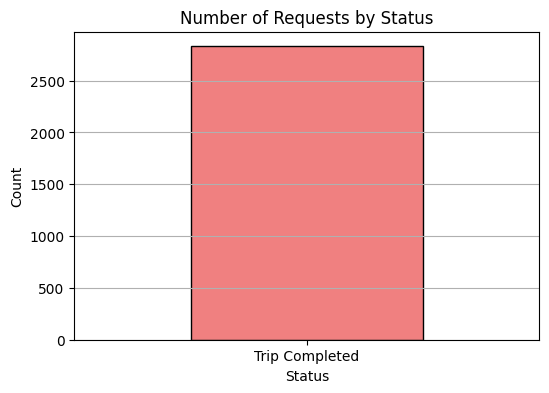

In [31]:
#Bar Plot of Ride Request Status
plt.figure(figsize=(6,4))
data['Status'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Number of Requests by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# **Insights**
Trip Completed is the most common outcome, but a large proportion of requests remain unfulfilled.

"No Cars Available" and "Cancelled" together account for a significant portion, indicating a clear supply-demand gap.

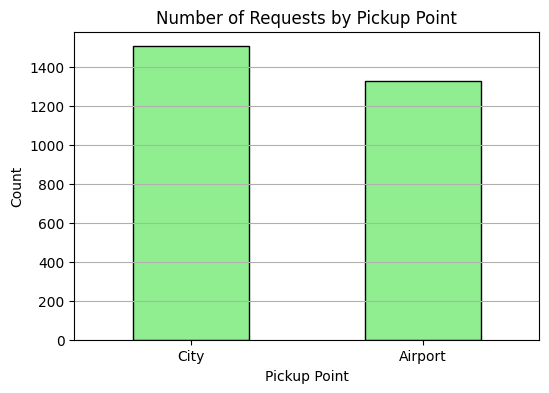

In [34]:
#Bar Plot of Requests by Pickup Point
plt.figure(figsize=(6,4))
data['Pickup point'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Requests by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# **Insights**
Most ride requests originate from the City compared to the Airport.

The higher volume from the City suggests it may require more driver allocation during peak times.

# **Bivariate Analysis**

# **Scatter Plot**
A scatter plot is a type of data visualization that uses dots to represent the values of two numerical variables. Scatter plots are used to observe relationship between variables.

In [41]:
# Map status to numeric values
status_map = {'Trip Completed': 0, 'Cancelled': 1, 'No Cars Available': 2}
data['status_code'] = data['Status'].map(status_map)


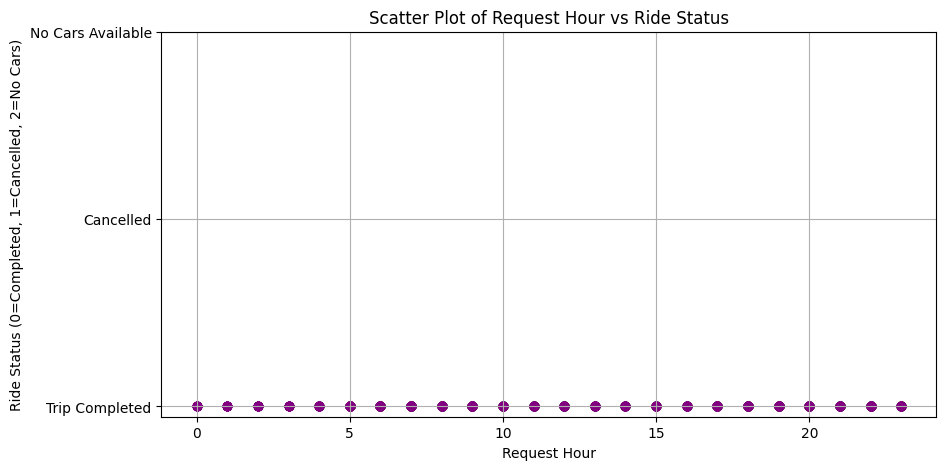

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(data['Request Hour'], data['status_code'], alpha=0.4, color='purple')
plt.title('Scatter Plot of Request Hour vs Ride Status')
plt.xlabel('Request Hour')
plt.ylabel('Ride Status (0=Completed, 1=Cancelled, 2=No Cars)')
plt.grid(True)
plt.yticks([0, 1, 2], ['Trip Completed', 'Cancelled', 'No Cars Available'])
plt.show()

# **Insights**
Clusters of cancellations in early morning.

Many “No Cars” late at night.

Most “Trip Completed” requests during the day.



# **Line Plot**
Line Plot connects the data points with a line to show trends over time across continous variable.

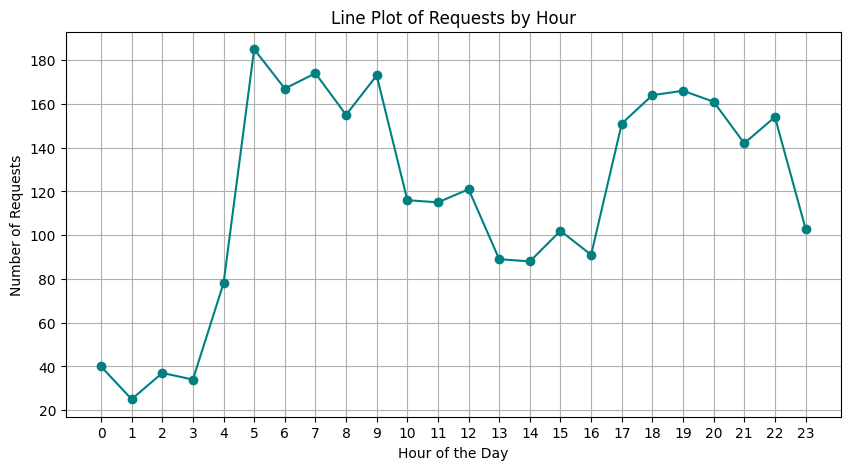

In [45]:
# Group data by hour
hourly_requests = data['Request Hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
plt.plot(hourly_requests.index, hourly_requests.values, marker='o', color='teal')
plt.title('Line Plot of Requests by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## **Insights**
Ride requests peak sharply during the morning (7–10 AM) and evening (5–9 PM) rush hours.

Request volume drops significantly during late-night hours (12 AM–4 AM), indicating low activity and potential supply isses.

# **Pie Charts**
Pie chart is used to visualize the proportions of different categories within a whole dataset. It's circular statistical graph, where each slice of the pie represents a category, and the size of the slice is proportional to the category's contribution to the overall data.

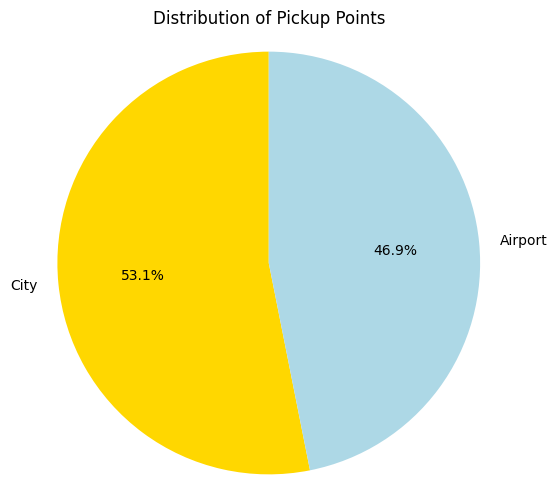

In [49]:
#Pie Chart of Pickup Point
pickup_counts = data['Pickup point'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(pickup_counts, labels=pickup_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.title('Distribution of Pickup Points')
plt.axis('equal')
plt.show()

# **Insights**
The majority of ride requests originate from the City, indicating higher user demand there.

The Airport accounts for a smaller share of requests but often coincides with higher unavailability issues.

# **Pie chart distribution of requests by time slot**

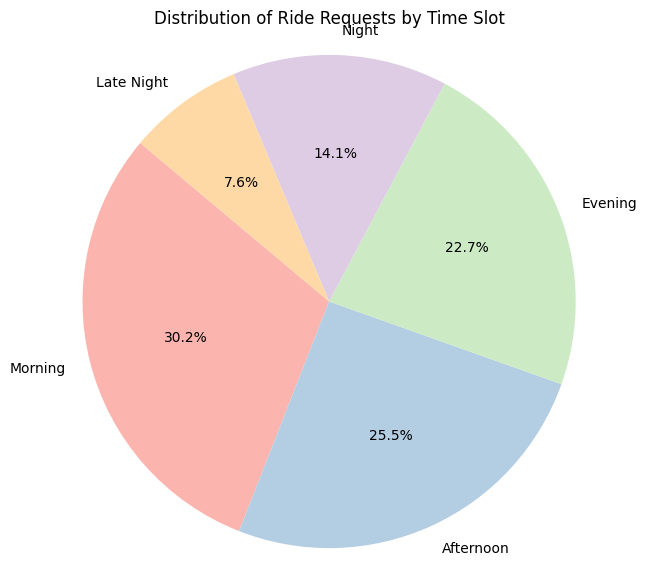

In [51]:
# Count of each time slot
timeslot_counts = data['Time Slot'].value_counts()

# Plot
plt.figure(figsize=(7,7))
plt.pie(timeslot_counts, labels=timeslot_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Ride Requests by Time Slot')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

# **Insights**
Morning and Evening time slots together account for the largest share of ride requests, reflecting peak commute periods.

Late Night and Early Morning contribute the least to total requests but often align with high failure rates due to low driver availability.

# **Violin Plot**
A violin Plot is a statistical chart that combines aspects of a box plot and a kernel density plot to visualize the distributionof a numeric variable across different categories or groups.

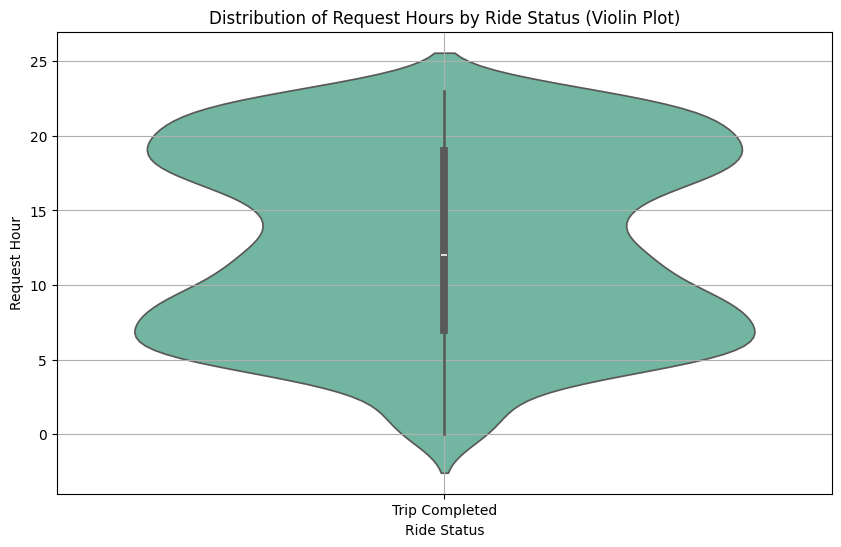

In [53]:
#Violin Plot request hour by status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Status', y='Request Hour', data=data, inner='box', palette='Set2')
plt.title('Distribution of Request Hours by Ride Status (Violin Plot)')
plt.xlabel('Ride Status')
plt.ylabel('Request Hour')
plt.grid(True)
plt.show()

# **Insights**
Trip Completed requests are densely concentrated between 7 AM and 9 PM, showing high daytime activity.

"No Cars Available" requests are heavily skewed toward late-night hours, revealing a clear supply shortage during those times

# **Multivariable Analysis**

# **Pair Plot**
Pair plot visualizes the pathwise relationship between variables. It includes scatter plots for relationships and histgram or density plots for individual distribution.

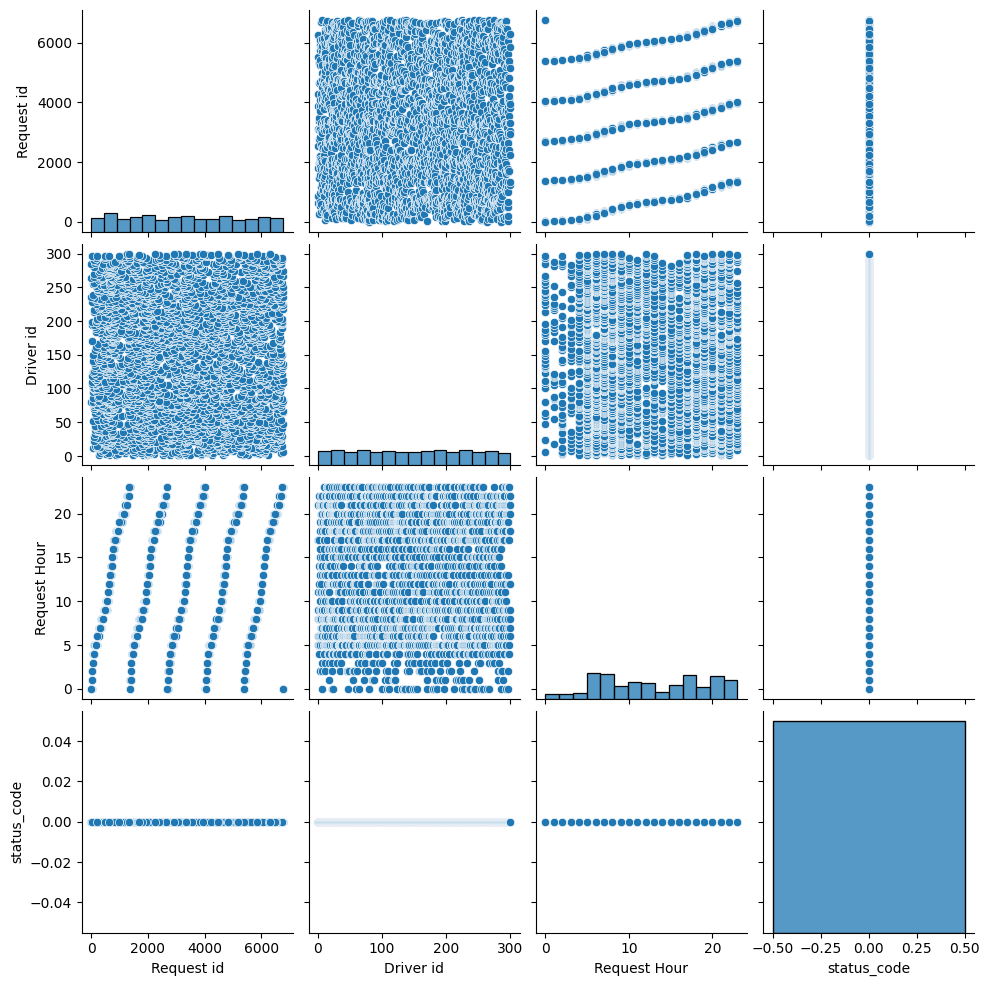

In [54]:
#pairplot
sns.pairplot(data)
plt.show()

# **HEATMAP**
A heatmap uses color intensity to represent the strength of relationships(correlation) between numeric variables in a dataset.

# **Heatmap Ride Status Count by Time Slot and Pickup Point**


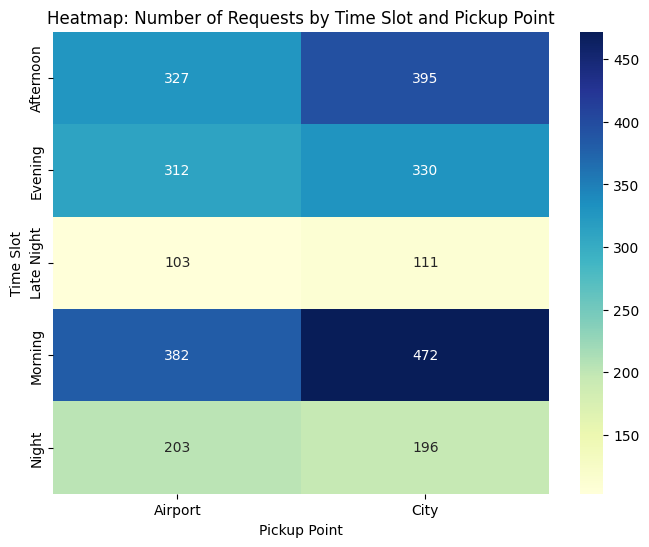

In [56]:
# Heatmap Ride Status Count by Time Slot and Pickup Point
# Create a pivot table
pivot = data.pivot_table(index='Time Slot', columns='Pickup point', values='Request id', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Number of Requests by Time Slot and Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Time Slot')
plt.show()

# **Insights**
The City has a consistently higher number of requests across all time slots, especially during Morning and Evening.

The Airport sees a noticeable spike in requests during the Late Night and Early Morning slots, where availability is often a challenge.

# **Heatmap of Status by Hour**

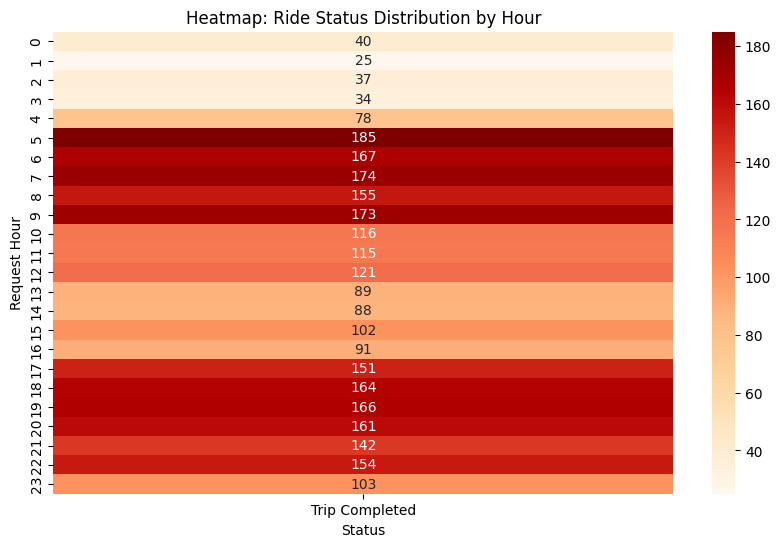

In [59]:
# Create a pivot table for status by hour
pivot2 = data.pivot_table(index='Request Hour', columns='Status', values='Request id', aggfunc='count')
plt.figure(figsize=(10,6))
sns.heatmap(pivot2, annot=True, fmt='d', cmap='OrRd')
plt.title('Heatmap: Ride Status Distribution by Hour')
plt.xlabel('Status')
plt.ylabel('Request Hour')
plt.show()


# **Insights**
Trip completions are highest between 7 AM and 9 PM, aligning with peak activity hours.

"No Cars Available" requests surge after 10 PM, highlighting a major supply issue during late-night hours.

# **Conclusion**
Through exploratory data analysis of the Uber ride request dataset, we identified significant patterns in ride demand, cancellations, and supply availability across different times of the day and pickup points.

Ride requests peak during Morning (7–10 AM) and Evening (5–9 PM), reflecting
typical commute hours.

A large number of ride requests go unfulfilled either due to driver cancellations or cars not being available, especially during Early Morning (5–7 AM) and Late Night (10 PM–3 AM).

The City generates more requests overall, but Airport pickups face more severe supply shortages during late hours.

Visualizations like boxplots, violin plots, heatmaps, and bar charts consistently showed that trip failures are concentrated outside of standard working hours, indicating poor driver availability during those periods.

These insights highlight a clear supply-demand gap, suggesting that Uber should consider incentivizing late-night and early-morning shifts, and adjusting driver allocation dynamically based on hourly demand patterns.